# Homework 2

## SVM Modeling with Cross-Validation

In [1]:
import os

#Data Manipulation Libraries
import pandas as pd
import numpy as np

#Regression Libraries
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn import svm
from scipy import stats

#Visualization Libraries
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#Checking where the Python Library is:
os.getcwd()

'C:\\Users\\cxs1rgf\\OneDrive - The Home Depot\\Desktop\\GitHub\\DataModeling\\Individual\\1.Candice\\Homework 2'

### Reading in Data

In [3]:
df = pd.read_csv('..\..\..\homework assignments\hw2-Fall_21\data 3.1\credit_card_data.txt',sep = '\t', header = None)
df.head(1)

In [4]:
len(df)

654

### Preprocessing Data
First separating X & y variables

In [5]:
#turning column names into list
cols = df.columns.tolist()

#Removing the first column name & assigning it to y_labels
y_labels = cols.pop(10)

#seting x_labels equal to the remaining columns
x_labels = cols

y = df[y_labels]
X = df[x_labels]

Scaling X data

In [6]:
scaler = StandardScaler()

X_scaled = scaler.fit(X)
X_scaled

StandardScaler()

Using CV method to reduce overfitting

In [7]:
clf = svm.SVC(kernel = 'linear')
scores = cross_val_score(clf, X, y, cv = 10)
scores

array([0.45454545, 0.81818182, 0.96969697, 0.93939394, 0.96923077,
       0.98461538, 0.93846154, 0.56923077, 0.98461538, 0.89230769])

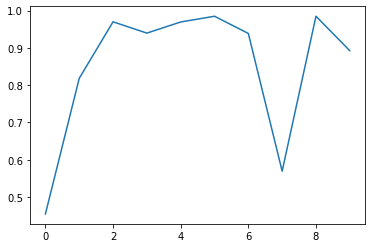

In [10]:
fig = plt.figure()
ax = plt.axes()

ax.plot(scores)

In [8]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.85 accuracy with a standard deviation of 0.18


In [11]:
clf

SVC(kernel='linear')

## KNN Modeling

Will need to try different number of neighbors to find optimal fit

Plotting Accuracies to find optimal number of clusters

We find the best accuracies with smaller number of clusters

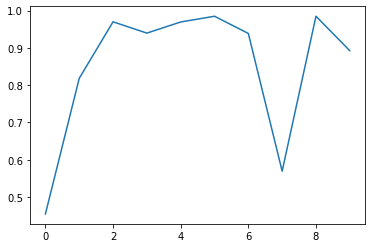

In [9]:
fig = plt.figure()
ax = plt.axes()

ax.plot(scores)

Redoing with smaller number of clusters, the optimal number is between 2 & 5 groups

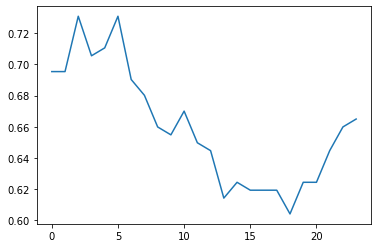

In [23]:
score = []
for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    # print(knn.predict(X_test))
    score.append(knn.score(X_test,y_test))
    
scores = cross_val_score(clf, X, y, cv = 10)
scores
    
fig = plt.figure()
ax = plt.axes()

ax.plot(score)